In [9]:
import pandas as pd 
from __future__ import unicode_literals
from hazm import *
from matplotlib import pyplot as plt
from operator import itemgetter
from math import log
import random

In [3]:
df = pd.read_csv("train.csv")
df.head(15)

,label,content
0,فناوری,گزارش های منتشر شده حاکی از آن است که کاربران ...
1,ورزشی,سوپر استار سینما و از قهرمانان سابق ووشو ــ کو...
2,حوادث,مدیرعامل شرکت عمران آب کیش از فوت یک نفر در آت...
3,فناوری,یک نوجوان انگلیسی به اتهام هک حساب‌های کاربری ...
4,سلامت,دانشمندان در جدیدترین مطالعات خود اثرات جدید و...
5,سلامت,مصرف میوه، یکی از راه های سالم برای کاهش وزن س...
6,سیاسی,رئیس جمهوری پیش‌بینی، پیشگیری و درمان آسیب‌های...
7,ورزشی,پرسپولیس با برتری ۲ بر صفر مقابل تراکتور، اختل...
8,ورزشی,مدیرعامل باشگاه استقلال گفت: برای گرفتن مجوز ح...
9,سیاسی,دبیرکل حزب اسلامی ایران زمین در واپسین دقایق م...


### Question 1)

In [4]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

#### Normalizer

In [5]:
normalizer.normalize(df['content'][0])

'گزارش\u200cهای منتشر شده حاکی از آن است که کاربران تلگرام در مناطقی از جهان همچون اروپا و خاورمیانه با مشکل مواجه شده\u200cاند. به گزارش ایسنا، به نقل از تلگرام، دقایقی پیش پیام رسان تلگرام در صفحه توییتر خود اعلام کرد که دسترسی کاربران این اپلیکیشن در اروپا و خاورمیانه با مشکل مواجه شده است. طبق این پیام، به نظر می\u200cرسد که منشا این اختلالات از ظهر امروز، پنج شنبه، خارجی و از سوی خود این پیام رسان بوده است و ارتباطی با داخل کشور ندارد. این پیام رسان در این خصوص عنوان کرده است که متخصصان تلگرام از زمانی که متوجه چنین اختلالی شده\u200cاند، در حال بررسی و برطرف کردن مشکل مربوطه بوده و امید است به زودی این اختلال رفع شود و کاربران به حساب\u200cهای کاربری خود در تلگرام دسترسی یابند.'

#### Stemming
This option removes semi-space from the words. Also,it usually cuts end of words.

In [6]:
print(stemmer.stem('کتاب‌ها'))
print(stemmer.stem('زیباروی'))

کتاب
زیبارو


#### Lemmatization
This option gives us the base form of the verb in Persian language ( **Bon-e-Mozare** &  **Bon-e-Mazi**).

In [7]:
print(lemmatizer.lemmatize("بخوریم"))
print(lemmatizer.lemmatize("رفتید"))

خورد#خور
رفت#رو


### Question 2)             

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$

$x$ : The word<br>
$c$ : The label of News<br>
$P(x|c)$ : The probability of seeing word $x$ in news with label of $c$ (**Likelihood**)<br>
$P(c|x)$ : The probability of the current news being label $c$ knowing that word $x$ appeared in context (**Posterior**)<br>
$P(c)$ : The probability of seeing news with label $c$ (**Class Prior Probability**)<br>
$P(x)$ : The probability of seeing word $x$ (**Predictor Prior Probability  / Evidence**)
#### Attention : we don't calculate $P(x)$, because it isn't necessary in camparing.
#### Attention : despite the better accuracy of bigram method, we use unigram method.

### Question 3)
examples:<br>
"گاز خانه قطع شده است"<br>
"زبانم را گاز گرفتم"<br>

in above examples the bigram method is better than unigram.
in first sentence,"گاز" means a kind of fossil fuel.
in second sentence,"گاز" means the tounge.

In my example the bigram method is enough, but in many other sentences we need to know longer parts of our sentence, so in some examples we need n-gram method.

### Question 4)

If word $x$ from the content only be found in just label $c$,we have $P(x|c) = 1$ and Naive Bayes will definetly choose that label as the answer. this functionality may be wrong in some situations.

If word $x$ hasn't appeared in label $c$, we have that $P(x|c) = 0$.
so for probability we have $log(0) = - \infty$ and the $ sum_{i=1}^{n} log(P(x_i | c)) $ will converge to $- \infty$ and because of that, the label $c$ will never be chosen as the answer.

### Question 5)
The none Additive smoothing equation is:

$$ \frac{Word Count}{Total Words}$$

And the Additive Smoothing equation is:

$$ \frac{Word Count + \alpha}{Total Words + \alpha.D} $$

In this equation $\alpha$ is a positive constant and $D$ is the number of distinct words in that label.

If we want to calculate probability without Additive Smoothing, the $\alpha$ is 0.

Because of Additive Smoothing the $- \infty$ problem mentioned in Question 4 is solved.Because the fraction will never be equal to 0 with effect of positive $\alpha$ in the numerator.

## PreProcessing
-    Normalizing: First we normalize the content of our dataframe for every row.
-    Stop Words: I used the hazm.utils to get the stopwords of farsi language to remove stopwords in content for better performance.
-    Punctuation Marks: punctutation marks are not useful in labaling and they should be removed
-    Tokenizing: According to the bag of words approach, tokenizing helps to break the senctence into its words.

We specify a dictionary for each label and a specific variable to save number of news in every label

In [8]:
technology_news = dict()
art_news = dict()
accident_news = dict()
sport_news = dict()
political_news = dict()
health_news = dict()

number_of_technology = 0
number_of_art = 0
number_of_accident = 0
number_of_sport = 0
number_of_political = 0
number_of_health = 0


punctuation_marks = ['-','_','!','"','#','(',')','*','.','...','....','/',':','[',']','،','؛','«','»',' ','']


for index, row in df.iterrows():
    norm=normalizer.normalize(row['content'])
    tokens = word_tokenize(norm)
    for token in tokens:
        bons=lemmatizer.lemmatize(token).split("#")
        word = bons[0]
        if (not word in stopwords_list() and not word in punctuation_marks):
            
            label = row['label']
            
            if (label == 'فناوری'):
                technology_news[word] = technology_news.get(word, 0) + 1
                number_of_technology += 1
                
            if (label == 'فرهنگی/هنری'):
                art_news[word] = art_news.get(word, 0) + 1
                number_of_art += 1
                
            if (label == 'حوادث'):
                accident_news[word] = accident_news.get(word, 0) + 1
                number_of_accident += 1
                
            if (label == 'ورزشی'):
                sport_news[word] = sport_news.get(word, 0) + 1
                number_of_sport += 1
                
            if (label == 'سیاسی'):
                political_news[word] = political_news.get(word, 0) + 1
                number_of_political += 1
                
            if (label == 'سلامت'):
                health_news[word] = health_news.get(word, 0) + 1 
                number_of_health += 1
                


We need this cell at Additive Smoothing part for $D$ value:

In [10]:
distinct_technology_news = len(list(technology_news.keys()))
distinct_art_news = len(list(art_news.keys()))
distinct_accident_news = len(list(accident_news.keys()))
distinct_sport_news = len(list(sport_news.keys()))
distinct_political_news = len(list(political_news.keys()))
distinct_health_news = len(list(health_news.keys()))

### Question 6)  Plots

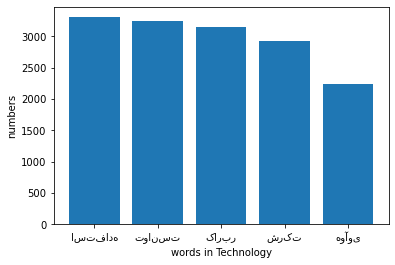

In [11]:
res = dict(sorted(technology_news.items(), key = itemgetter(1), reverse = True)[:5])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in Technology')
plt.ylabel('numbers')
plt.show()

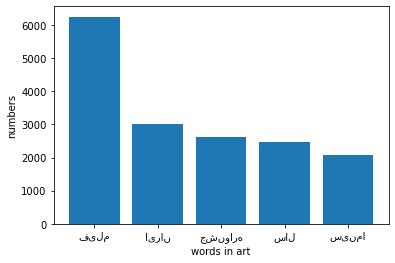

In [12]:
res = dict(sorted(art_news.items(), key = itemgetter(1), reverse = True)[:5])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in art')
plt.ylabel('numbers')
plt.show()

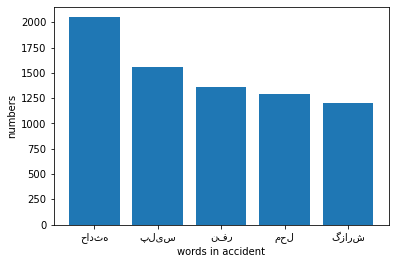

In [13]:
res = dict(sorted(accident_news.items(), key = itemgetter(1), reverse = True)[:5])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in accident')
plt.ylabel('numbers')
plt.show()

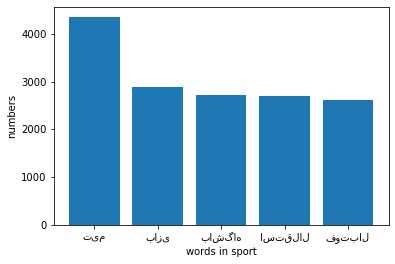

In [14]:
res = dict(sorted(sport_news.items(), key = itemgetter(1), reverse = True)[:5])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in sport')
plt.ylabel('numbers')
plt.show()

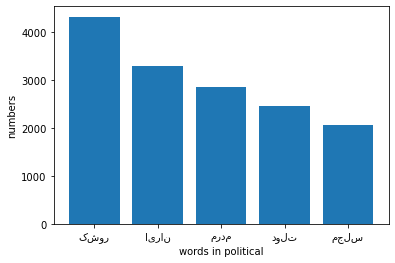

In [15]:
res = dict(sorted(political_news.items(), key = itemgetter(1), reverse = True)[:5])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in political')
plt.ylabel('numbers')
plt.show()

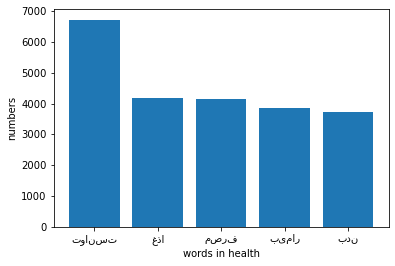

In [16]:
res = dict(sorted(health_news.items(), key = itemgetter(1), reverse = True)[:5])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in health')
plt.ylabel('numbers')
plt.show()

### Question 7)

If our classifier always predict Technology for a label, the recall value for the class Technology will be 100% and we know that  this model is not good. 

There might be a case that we only have 2 predictions for the Technology label out of a total number of 100000 predictions. The probability of making a mistake in two predictions would be so low because we made only 2 predictions. So this might lead to a 100% precision and a low recall beucase of missing many other instances of Technology 

### Question 8)


**F1 Score**: Is the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.<br>

Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.


$$F_{1} = 2\frac{Precision.Recall}{Precision + Recall} = \frac{TP}{TP + \frac{FP + FN}{2}}$$

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

**TP**: True positive<br>
**TN**: True negetive<br>
**FP**: False positive<br>
**FN**: False negetive<br>

### Question 9)

**Micro**: computes F1-score by value total true positives, false negatives and false positives (no matter of the prediction for each label in the dataset)

**Macro**: computess F1-score for each label, and returns the average without considering the proportion for each label in the dataset.

**Weighted**: computes F1-score for each label, and returns the average considering the proportion for each label in the dataset.

In [17]:
tdf = pd.read_csv("test.csv")
tdf.head(5)

,label,content
0,فناوری,بعد از اعلام لیست ۲۳ شرکت مجاز ثبت سفارش و ارا...
1,فرهنگی/هنری,یک استاد علم قرائت قرآن کریم، گفت: ریشه موسیقی...
2,حوادث,آتش سوزی های زنجیره ای جنگل های زاگرس در استان...
3,فناوری,استفاده از سرویس‌های iMassage یا Facetime محصو...
4,حوادث,دادستان عمومی و انقلاب یاسوج گفت: 10 میلیون دل...


In [18]:
def get_label_index(a):
    genres = []
    genres.append('فناوری')
    genres.append('فرهنگی/هنری')
    genres.append('حوادث')
    genres.append('ورزشی')
    genres.append('سیاسی')
    genres.append('سلامت')
    return genres.index(a)


## Detection Without Additive Smoothing

In [19]:


ZERO = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001


def calcProbsWithoutSmoothing(phrase):
    norm = normalizer.normalize(phrase)
    tokens = word_tokenize(norm)
    contribution = [0, 0, 0, 0, 0, 0]

    for token in tokens:

        bons=lemmatizer.lemmatize(token).split("#")
        word = bons[0]

        if (word in stopwords_list() or  word in punctuation_marks ):
            continue
            
            
        if (word in technology_news):
            contribution[0] += log((technology_news[word]) / (number_of_technology))
        else:
            contribution[0] += log(ZERO)
            
        
        if (word in art_news):
            contribution[1] += log((art_news[word]) / (number_of_art))
        else:
            contribution[1] += log(ZERO)
            
        
        if (word in accident_news):
            contribution[2] += log((accident_news[word]) / (number_of_accident))
        else:
            contribution[2] += log(ZERO)
        
        if (word in sport_news):
            contribution[3] += log((sport_news[word]) / (number_of_sport))
        else:
            contribution[3] += log(ZERO)
                
        if (word in political_news):
            contribution[4] += log((political_news[word]) / (number_of_political))
        else:
            contribution[4] += log(ZERO)
     
        
        if (word in health_news):
            contribution[5] += log((health_news[word]) / (number_of_health))
        else:
            contribution[5] += log(ZERO)
        
    return contribution

In [20]:
tp = [0, 0, 0, 0, 0, 0]
fp = [0, 0, 0, 0, 0, 0]
fn = [0, 0, 0, 0, 0, 0]
correct = 0


for index, row in tdf.iterrows():
    
    p_content = calcProbsWithoutSmoothing(row['content'])
    mx_content = max(p_content)
    detect = p_content.index(mx_content, 0)
    
    label = get_label_index(row['label'])
    if (label == detect):
        correct += 1
        tp[detect] += 1
    else:
        fp[detect] += 1
        fn[label] += 1

In [21]:
def get_label(index):
    if (index == 0):
        return 'Technology'
    if (index == 1):
        return 'Art'
    if (index == 2):
        return 'Accident'
    if (index == 3):
        return 'Sport'
    if (index == 4):
        return 'Political'
    if (index == 5):
        return 'Health'

### Question 10)
## Result Without Additive Smoothing

In [22]:
print("Accuracy: ", correct / len(tdf),"\n")
print("Precision, Recall, and F1 for all labels:\n")
for i in range(6):
    precision = tp[i] / (tp[i] + fp[i])
    recall = tp[i] / (tp[i] + fn[i])
    f1 = (2 * precision * recall) / (precision + recall)
    print("Label ", get_label(i))
    print("TP Count: ", tp[i])
    print("FP Count: ", fp[i])
    print("FN Count: ", fn[i])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1,"\n")

Accuracy:  0.8672645739910314 

Precision, Recall, and F1 for all labels:

Label  Technology
TP Count:  149
FP Count:  17
FN Count:  19
Precision: 0.8975903614457831
Recall: 0.8869047619047619
F1: 0.8922155688622753 

Label  Art
TP Count:  159
FP Count:  68
FN Count:  21
Precision: 0.7004405286343612
Recall: 0.8833333333333333
F1: 0.7813267813267813 

Label  Accident
TP Count:  154
FP Count:  9
FN Count:  46
Precision: 0.9447852760736196
Recall: 0.77
F1: 0.8484848484848485 

Label  Sport
TP Count:  169
FP Count:  3
FN Count:  21
Precision: 0.9825581395348837
Recall: 0.8894736842105263
F1: 0.9337016574585636 

Label  Political
TP Count:  176
FP Count:  43
FN Count:  24
Precision: 0.8036529680365296
Recall: 0.88
F1: 0.8400954653937948 

Label  Health
TP Count:  160
FP Count:  8
FN Count:  17
Precision: 0.9523809523809523
Recall: 0.903954802259887
F1: 0.9275362318840581 



### Macro Average Without Additive Smoothing: 

$$F_1 = \frac{0.89 + 0.78 + 0.84 + 0.93 + 0.84 + 0.92}{6} = 86.66\%$$

$$Precision = \frac{0.89 + 0.88 + 0.94 + 0.98 + 0.80 + 0.95}{6} = 87.66\%$$

$$Recall = \frac{0.88 + 0.84 + 0.77 + 0.88 + 0.88 + 0.90}{6} = 85.83\%$$

### Micro Average Without Additive Smoothing:

$$Precision = \frac{TP1 + TP2 + TP3 + TP4 + TP5 + TP6}{TP1 + FP1 + TP2 + FP2 + TP3 + FP3 + TP4 + FP4 + TP5 + FP5 + TP6 + FP6}$$

$$ Precision = \frac{149 + 159 + 154 + 169 + 176 + 160}{149 + 17 + 159 + 68 + 154 + 9 + 169 + 3 + 176 + 43 + 160 + 8} = 86.72\%$$



$$Recall = \frac{TP1 + TP2 + TP3 + TP4 + TP5 + TP6}{TP1 + FN1 + TP2 + FN2 + TP3 + FN3 + TP4 + FN4 + TP5 + FN5 + TP6 + FN6}$$


$$ Recall = \frac{149 + 159 + 154 + 169 + 176 + 160}{149 + 19 + 159 + 21 + 154 + 46 + 169 + 21 + 176 + 24 + 160 + 17} = 86.72\%$$

$$ F_1 = 2\frac{Precision.Recall}{Precision + Recall} = 86.72\%$$

### Weighted Average Without Additive Smoothing:

The number of smaples for every label is equal to (TP + FN)<br>
So for every label we have:

Technology: 149 + 19 = 168 <br>
Art: 159 + 21 = 180 <br>
Accident: 154 + 46 = 200 <br>
Sport: 169 + 21 = 190 <br>
Political: 176 + 24 = 200 <br>
Health: 160 + 17 = 177 <br>

Total: 1115


$$F_1 = \frac{(0.89 * 168 + 0.78 * 180 + 0.84 * 200 + 0.93 * 190 + 0.84 * 200 + 0.92 * 177)}{1115} = 86.5\%$$

$$Precision = \frac{(0.89 * 168 + 0.88 * 180 + 0.94 * 200 + 0.98 * 190 + 0.80 * 200 + 0.95 * 177)}{1115} = 90\%$$

$$Recall = \frac{(0.88 * 168 + 0.84 * 180 + 0.77 * 200 + 0.88 * 190 + 0.88 * 200 + 0.90 * 177)}{1115} = 85.6\%$$

## Detection With Additive Smoothing

In [23]:

def calcProbsWithSmoothing(phrase):
    norm = normalizer.normalize(phrase)
    tokens = word_tokenize(norm)
    contribution = [0, 0, 0, 0, 0, 0]
    
    k = 1 #alpha

    for token in tokens:
        
        bons=lemmatizer.lemmatize(token).split("#")
        word = bons[0]

        if (word in stopwords_list() or  word in punctuation_marks):
            continue
            
        
        contribution[0] += log((technology_news.get(word, 0) + k) / (number_of_technology + k * distinct_technology_news))
            
        contribution[1] += log((art_news.get(word, 0) + k) / (number_of_art + k * distinct_art_news))
            
        contribution[2] += log((accident_news.get(word, 0) + k) / (number_of_accident + k * distinct_accident_news))
            
        contribution[3] += log((sport_news.get(word, 0) + k) / (number_of_sport + k * distinct_sport_news))
        
        contribution[4] += log((political_news.get(word, 0) + k) / (number_of_political + k * distinct_political_news))
    
        contribution[5] += log((health_news.get(word, 0) + k) / (number_of_health + k * distinct_health_news))
        

    return contribution

In [26]:
tp = [0, 0, 0, 0, 0, 0]
fp = [0, 0, 0, 0, 0, 0]
fn = [0, 0, 0, 0, 0, 0]
correct = 0

wrong = []
p_wrong = []

for index, row in tdf.iterrows():
    
    p_content = calcProbsWithSmoothing(row['content'])
    mx_content = max(p_content)
    detect = p_content.index(mx_content, 0)
    
    label = get_label_index(row['label'])
    if (label == detect):
        correct += 1
        tp[detect] += 1
    else:
        fp[detect] += 1
        fn[label] += 1
        wrong.append(row)
        p_wrong.append(detect)

### Question 10)
## Result With Additive Smoothing

In [27]:
print("Accuracy: ", correct / len(tdf),"\n")
print("Precision, Recall, and F1 for all labels:\n")
for i in range(6):
    precision = tp[i] / (tp[i] + fp[i])
    recall = tp[i] / (tp[i] + fn[i])
    f1 = (2 * precision * recall) / (precision + recall)
    print("Label ", get_label(i))
    print("TP Count: ", tp[i])
    print("FP Count: ", fp[i])
    print("FN Count: ", fn[i])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1,"\n")

Accuracy:  0.9417040358744395 

Precision, Recall, and F1 for all labels:

Label  Technology
TP Count:  156
FP Count:  8
FN Count:  12
Precision: 0.9512195121951219
Recall: 0.9285714285714286
F1: 0.9397590361445782 

Label  Art
TP Count:  158
FP Count:  5
FN Count:  22
Precision: 0.9693251533742331
Recall: 0.8777777777777778
F1: 0.9212827988338192 

Label  Accident
TP Count:  193
FP Count:  22
FN Count:  7
Precision: 0.8976744186046511
Recall: 0.965
F1: 0.9301204819277108 

Label  Sport
TP Count:  185
FP Count:  3
FN Count:  5
Precision: 0.9840425531914894
Recall: 0.9736842105263158
F1: 0.9788359788359788 

Label  Political
TP Count:  190
FP Count:  23
FN Count:  10
Precision: 0.892018779342723
Recall: 0.95
F1: 0.9200968523002421 

Label  Health
TP Count:  168
FP Count:  4
FN Count:  9
Precision: 0.9767441860465116
Recall: 0.9491525423728814
F1: 0.9627507163323781 



### Macro Average With Additive Smoothing: 


$$F_1 = \frac{0.93 + 0.92 + 0.93 + 0.97 + 0.92 + 0.96}{6} = 93.33\%$$

$$Precision = \frac{0.95 + 0.96 + 0.89 + 0.98 + 0.89 + 0.97}{6} = 94\%$$

$$Recall = \frac{0.92 + 0.87 + 0.96 + 0.97 + 0.95 + 0.94}{6} = 93.5\%$$

### Micro Average With Additive Smoothing:

$$Precision = \frac{TP1 + TP2 + TP3 + TP4 + TP5 + TP6}{TP1 + FP1 + TP2 + FP2 + TP3 + FP3 + TP4 + FP4 + TP5 + FP5 + TP6 + FP6}$$

$$ Precision = \frac{156 + 158 + 193 + 185 + 190 + 168}{156 + 8 + 158 + 5 + 193 + 22 + 185 + 3 + 190 + 23 + 168 + 4} = 94.1\%$$


$$Recall = \frac{TP1 + TP2 + TP3 + TP4 + TP5 + TP6}{TP1 + FN1 + TP2 + FN2 + TP3 + FN3 + TP4 + FN4 + TP5 + FN5 + TP6 + FN6}$$


$$ Recall = \frac{156 + 158 + 193 + 185 + 190 + 168}{156 + 12 + 158 + 22 + 193 + 7 + 185 + 5 + 190+ 10 + 168 + 9} = 94.1\%$$

$$ F_1 = 2\frac{Precision.Recall}{Precision + Recall} = 94.1\%$$

### Weighted Average With Additive Smoothing:

The number of smaples for every label is equal to (TP + FN)<br>
So for every label we have:

Technology: 156 + 12 = 168 <br>
Art: 158 + 22 = 180 <br>
Accident: 193 + 7 = 200 <br>
Sport: 185 + 5 = 190 <br>
Political: 190 + 10 = 200 <br>
Health: 168 + 9 = 177 <br>

Total: 1115

$$F_1 = \frac{(0.93 * 168  + 0.92 * 180 + 0.93 * 200 + 0.97 * 190 + 0.92 * 200 + 0.96 * 177)}{1115} = 93.8\%$$

$$Precision = \frac{(0.95 * 168 + 0.96 * 180 + 0.89 * 200 + 0.98 * 190 + 0.89 * 200 + 0.97 * 177)}{1115} = 93.83\%$$

$$Recall = \frac{(0.92 * 168 + 0.87 * 180 + 0.96 * 200 + 0.97 * 190 + 0.95 * 200 + 0.94 * 177)}{1115} = 93.6\%$$


### Question 11) 
After calculating the probability with Additive Smoothing, our results got better and obove 90%

### Question 12)
#### wrong predictaions sample:

In [28]:
w = pd.DataFrame(wrong)
w.head()

,label,content
30,فرهنگی/هنری,- چهارشنبه اول تیر 1401 اتفاق نادر و جالبی رخ ...
45,فرهنگی/هنری,اعتراض گسترده کاربران توییتر به اظهارات وزیر ا...
65,حوادث,ملی‌پوش سابق دوچرخه سواری ایران به علت تصادف د...
74,سیاسی,وکیل مدافع نازنین زاغری متهم ایرانی - بریتانیا...
85,فرهنگی/هنری,- روز گذشته در حاشیه معرفی ساپینتو سر مربی باش...


### Let's analyze a wrong prediction:
The below news is labeled as Political at first
But the prediction was wrong and we labeled it to Art.
This wrong prediction happend because the news is about art in political way and has the words that mostly exist in Art news.

The solution that maybe help to predict these kind of news correctly, is that we use bigram or even n-gram method for word predection or we can get bigger data set for our prediction.

In [49]:
print(p_wrong[0])

4


In [50]:
print(w['label'][30])

فرهنگی/هنری


In [51]:
print(w['content'][30])

- چهارشنبه اول تیر 1401 اتفاق نادر و جالبی رخ داد که قطعا به صورت تصادفی و بدون برنامه‌ریزی و اطلاع قبلی بوده است: این که به شکل کاملا هم‌زمان در محل انجمن صنفی روزنامه‌نگاران استان تهران از رونمایی شد و در صدا‌و‌سیما و در جمع معاونان سازمان هم از کلیات « ».   اگرچه سه واژۀ در هر دو مشترک‌اند اما هیچ ربط و شباهتی به هم ندارند. چرا که در اولی منظور از سند است و در دومی سند (در حالی که به تعبیر دکتر وب‌2 را هم پشت سر گذاشته و به زودی وارد وب‌3 خواهیم شد) و خود رادیو و تلویزیون دیگر رسانۀ مدرن نیست و به تعبیری رسانۀ تلویزیون در معنی عام و جهانی نه مشخصا صدا و سیما هر چند در ایران همچنان رایگان‌ترین و گسترده‌ترین امکان وقت‌گذرانی و ارتباطی است. (رایگان از جهت پرداخت حق اشتراک وگرنه بودجۀ آن از جیب ملت تأمین می‌شود). در اولی منظور از رسانه واقعا رسانه است. یعنی بدون بودجۀ حکومتی و مخاطب‌محور و در دومی به جز تعبیر «رسانه ملی» در باقی موارد ترجیح می‌دهند از مفاهیم ایدیولوژیک استفاده کنند و آن را در واقع عرصۀ جنگ می‌دانند یا با واژه های جنگ و قرارگاه حجم عظیم پرسنل و بودجه های کلان و انحصار و 